In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1ji0Stj7xl4HWKYptkDCibEE2XHYyF6Wl'
downloaded = drive.CreateFile({'id': id})

downloaded.GetContentFile('train_transaction.csv')

df = pd.read_csv('train_transaction.csv')

id='1h5nClzzoNaX4t5rpvKbs1djxAM_VRI81'
downloaded = drive.CreateFile({'id': id})

downloaded.GetContentFile('train_identity.csv')

df_id = pd.read_csv('train_identity.csv')

id='16KBWbCNC_AEpn_lqtmtDfDfsoLsX6wDK'
downloaded = drive.CreateFile({'id': id})

downloaded.GetContentFile('test_transaction.csv')

test = pd.read_csv('test_transaction.csv')

id='1Z0MEgka6hlAm-qd5Gh-fk9zLiMfOaZ0c'
downloaded = drive.CreateFile({'id': id})

downloaded.GetContentFile('test_identity.csv')

df_id_test = pd.read_csv('test_identity.csv')

In [ ]:
df = df.join(df_id.set_index('TransactionID'), on='TransactionID', how='outer')
test = test.join(df_id_test.set_index('TransactionID'), on='TransactionID', how='outer')

In [ ]:
df_test_t_id = test['TransactionID'].copy()

In [ ]:
model_columns = ['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                  'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
                  'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 
                  'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04', 
                  'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17',
                  'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
                  'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'V1', 'V2', 'V3',
                  'V4', 'V5', 'V6', 'V17', 'V18', 'V19', 'V20', 'V23', 'V24', 'V25', 'V26', 'V28', 'V29', 'V30',
                  'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V65', 'V66', 'V67', 'V72', 'V73', 'V79', 'V80', 'V126', 'V132',
                  'V133', 'V134', 'V135', 'V140', 'V141', 'V142', 'V143', 'V144', 'V156', 'V157', 'V174', 'V175', 'V176', 'V186', 'V187',
                  'V203', 'V205', 'V207', 'V213', 'V214', 'V217', 'V218', 'V219', 'V228', 'V230', 'V232', 'V243', 'V244', 'V267', 'V273',
                  'V275', 'V308', 'V331', 'V332', 'V333'] 

In [ ]:
#replaces the names on the columns from the test set by the ones in the train set
#test set has the same columns except isFraud this is just because of spelling errors
import numpy as np
columns_true = list(df.columns)
columns_true.pop(1)
columns_dict = {}
columns_false = list(test.columns)
for i, v in enumerate(columns_true):
  columns_dict[columns_false[i]] = v 
test.rename(columns=columns_dict, inplace=True)

In [ ]:
#drop columns not in specified list
df = df[df.columns.intersection(model_columns)]
test = test[test.columns.intersection(model_columns)]

In [ ]:
#one hot encoding, mainly used in binary columns
def oneHot(df, column):
  df[column] = df[column].fillna('NaN')
  df = pd.concat([df, pd.get_dummies(df[column])], axis=1)
  return df.drop([column], axis=1)
#one hot encoding but remove the nan column
#for binary columns with nans acts as binary encoding as nans wikk be represented by 0,0
def oneHotNoNaN(df, column):
  df[column] = df[column].fillna('NaN')
  columns = pd.get_dummies(df[column])
  columns = columns.drop(['NaN'], axis=1)
  df = pd.concat([df, columns], axis=1)
  return df.drop([column], axis=1)
df = oneHot(df, 'DeviceType')
df = oneHotNoNaN(df, 'id_35')
df = oneHotNoNaN(df, 'id_36')
df = oneHotNoNaN(df, 'id_37')
df = oneHotNoNaN(df, 'id_38')
df = oneHotNoNaN(df, 'id_15')
df = oneHotNoNaN(df, 'id_28')
df = oneHotNoNaN(df, 'id_12')
df = oneHotNoNaN(df, 'id_16')
df = oneHotNoNaN(df, 'id_29')
test = oneHot(test, 'DeviceType')
test = oneHotNoNaN(test, 'id_35')
test = oneHotNoNaN(test, 'id_36')
test = oneHotNoNaN(test, 'id_37')
test = oneHotNoNaN(test, 'id_38')
test = oneHotNoNaN(test, 'id_15')
test = oneHotNoNaN(test, 'id_28')
test = oneHotNoNaN(test, 'id_12')
test = oneHotNoNaN(test, 'id_16')
test = oneHotNoNaN(test, 'id_29')
df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_30,id_31,id_32,id_33,id_34,DeviceInfo,NaN,desktop,mobile,F,T,F,T,F,T,F,T,Found,New,Unknown,Found,New,Found,NotFound,Found,NotFound,Found,NotFound
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-480.0,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,SAMSUNG SM-G892A Build/NRD90M,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [ ]:
#experimental encoding
#orden is based on leverage levels
# a debit card has no leverage while a charged card has to be paid monthly with no exceptions
labels = {'debit': 1, 'debit or credit': 2, 'credit': 3, 'charge card': 4}
df.replace({'card6' : labels},inplace=True)
df['card6'] = df['card6'].fillna(df['card6'].mean())
test.replace({'card6' : labels},inplace=True)
test['card6'] = test['card6'].fillna(df['card6'].mean())

In [ ]:
import numpy as np
#encode resolution in two columns for width and height
def split_res(res):
  split = str(res).split('x')
  if split[0] == 'nan':
    return np.NaN, np.NaN
  return int(split[0]), int(split[1])
df['res1'], df['res2'] = zip(*df['id_33'].map(split_res))
df.drop(['id_33'], axis=1, inplace=True)
test['res1'], test['res2'] = zip(*test['id_33'].map(split_res))
test.drop(['id_33'], axis=1, inplace=True)
test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_30,id_31,id_32,id_34,DeviceInfo,NaN,desktop,mobile,F,T,F,T,F,T,F,T,Found,New,Unknown,Found,New,Found,NotFound,Found,NotFound,Found,NotFound,res1,res2
0,18403224,31.95,W,10409,111.0,150.0,visa,226.0,1.0,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,18403263,49.00,W,4272,111.0,150.0,visa,226.0,1.0,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,18403310,171.00,W,4476,574.0,150.0,visa,226.0,1.0,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,18403310,284.95,W,10989,360.0,150.0,visa,166.0,1.0,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,1.0,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
split = int(df.shape[0] * 0.8)# 80-20 train validation split
train = df.iloc[:split,:]
validation = df.iloc[split:,:]
#train set is the uper rows and validation the lower ones as the dataframe is sorted by time
#this prevents future information to predict the past

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
#vectorized encoding based on words in a column
from sklearn.feature_extraction.text import CountVectorizer
def get_columns_vectorized(column, vocab, count_vect):
    cvec_counts = count_vect.transform(column)
    cvec_counts_bow = cvec_counts.toarray()
    return pd.DataFrame(cvec_counts_bow, columns=vocab)
train['id_30'] = train['id_30'].fillna('NaN')
validation['id_30'] = validation['id_30'].fillna('NaN')
test['id_30'] = test['id_30'].fillna('NaN')
count_vect = CountVectorizer(min_df=0.001) #just uses frecuent words
count_vect.fit(train['id_30'])
vocab = count_vect.get_feature_names() 
print(vocab)
train_vect = get_columns_vectorized(train['id_30'], vocab, count_vect)
validation_vect = get_columns_vectorized(validation['id_30'], vocab, count_vect) #this vectorizes just with words seen in train
test_vect = get_columns_vectorized(test['id_30'], vocab, count_vect)
train = pd.concat([train, train_vect], axis=1)
validation.reset_index(drop=True, inplace=True)
validation_vect.reset_index(drop=True, inplace=True)
validation = pd.concat([validation, validation_vect], axis=1)
test.reset_index(drop=True, inplace=True)
test_vect.reset_index(drop=True, inplace=True)
test = pd.concat([test, test_vect], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10', '10_10_5', '10_11_6', '10_12_6', '10_13_1', '10_13_2', '10_13_3', '10_9_5', '11', 'android', 'ios', 'linux', 'mac', 'nan', 'os', 'windows']


In [ ]:
train['DeviceInfo'] = train['DeviceInfo'].fillna('NaN')
validation['DeviceInfo'] = validation['DeviceInfo'].fillna('NaN')
test['DeviceInfo'] = test['DeviceInfo'].fillna('NaN')
count_vect = CountVectorizer(min_df=0.001) #just uses frecuent words
count_vect.fit(train['DeviceInfo'])
vocab = count_vect.get_feature_names() 
print(vocab)
train_vect = get_columns_vectorized(train['DeviceInfo'], vocab, count_vect)
validation_vect = get_columns_vectorized(validation['DeviceInfo'], vocab, count_vect) #this vectorizes just with words seen in train
test_vect = get_columns_vectorized(test['DeviceInfo'], vocab, count_vect)
train = pd.concat([train, train_vect], axis=1)
validation.reset_index(drop=True, inplace=True)
validation_vect.reset_index(drop=True, inplace=True)
validation = pd.concat([validation, validation_vect], axis=1)
test.reset_index(drop=True, inplace=True)
test_vect.reset_index(drop=True, inplace=True)
test = pd.concat([test, test_vect], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['11', '137', '14', '57', '93', 'build', 'device', 'g610m', 'huawei', 'ios', 'j700m', 'l03', 'lg', 'lmy47v', 'lmy48b', 'lrx22g', 'macos', 'mmb29k', 'mmb29m', 'moto', 'mra58k', 'nan', 'nmf26x', 'nrd90m', 'plus', 'rv', 'samsung', 'sm', 'trident', 'windows']


In [ ]:
#mean encoding for every object column
#makes NaN a category by making it a string
columns = train.columns
for i, type in enumerate(train.dtypes):
  if type == 'object':
    column = columns[i]
    train[column] = train[column].fillna('NaN')
    validation[column] = validation[column].fillna('NaN')
    test[column] = test[column].fillna('NaN')
    mean_dict = dict(train.groupby(column)['isFraud'].mean())
    train.replace({column : mean_dict},inplace=True)
    validation.replace({column : mean_dict},inplace=True) #instead of mean encoding the validation set with its own data it encodes it with trains data
    test.replace({column : mean_dict},inplace=True) #same here

In [ ]:
#make new values in validation and test nan
validation.apply(pd.to_numeric, errors='coerce')
test.apply(pd.to_numeric, errors='coerce')
#fill nan values with the column average
for column in test:
  train[column] = train[column].fillna(train[column].mean())
  validation[column] = validation[column].fillna(train[column].mean())
  test[column] = test[column].fillna(train[column].mean())

In [ ]:
#split target from features
train_target = train['isFraud'].copy()
validation_target = validation['isFraud'].copy()
train.drop(['isFraud'], axis=1, inplace=True)
validation.drop(['isFraud'], axis=1, inplace=True)

In [ ]:
#normalization for every column except binary ones
train.loc[:, :'id_34'] =(train.loc[:, :'id_34']-train.loc[:, :'id_34'].mean())/train.loc[:, :'id_34'].std()
train.loc[:, 'res1'] =(train.loc[:, 'res1']-train.loc[:, 'res1'].mean())/train.loc[:, 'res1'].std()
train.loc[:, 'res2'] =(train.loc[:, 'res2']-train.loc[:, 'res2'].mean())/train.loc[:, 'res2'].std()
validation.loc[:, :'id_34'] =(validation.loc[:, :'id_34']-validation.loc[:, :'id_34'].mean())/validation.loc[:, :'id_34'].std()
validation.loc[:, 'res1'] =(validation.loc[:, 'res1']-validation.loc[:, 'res1'].mean())/validation.loc[:, 'res1'].std()
validation.loc[:, 'res2'] =(validation.loc[:, 'res2']-validation.loc[:, 'res2'].mean())/validation.loc[:, 'res2'].std()
test.loc[:, :'id_34'] =(test.loc[:, :'id_34']-test.loc[:, :'id_34'].mean())/test.loc[:, :'id_34'].std()
test.loc[:, 'res1'] =(test.loc[:, 'res1']-test.loc[:, 'res1'].mean())/test.loc[:, 'res1'].std()
test.loc[:, 'res2'] =(test.loc[:, 'res2']-test.loc[:, 'res2'].mean())/test.loc[:, 'res2'].std()

In [ ]:
import gc
df = None
df_id_test = None
df_id = None
train_vect = None
validation_vect = None
test_vect = None
gc.collect()

50

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import os
import random
from keras import backend as K

random.seed(54836)
os.environ['PYTHONHASHSEED']=str(54836)
tf.random.set_seed(54836)
np.random.seed(54836)

model = Sequential()
model.add(Dropout(0.1))
model.add(Dense(50, activation='tanh'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['AUC'], optimizer='adam')

model.fit(train, train_target, epochs=30, batch_size=32)


Epoch 1/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.1068 - auc: 0.8474
Epoch 2/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0979 - auc: 0.8724
Epoch 3/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0949 - auc: 0.8804
Epoch 4/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0929 - auc: 0.8853
Epoch 5/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0914 - auc: 0.8883
Epoch 6/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0901 - auc: 0.8922
Epoch 7/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0895 - auc: 0.8919
Epoch 8/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0888 - auc: 0.8945
Epoch 9/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0878 - auc: 0.8961
Epoch 10/30
14764/14764 [==============================] - 36s 2ms/step - loss: 0.0876 - auc: 0.8969

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_target, model.predict(train))

0.9275769682762147

In [ ]:
#eliminate new values that havent been encoded
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

validation = validation[validation.applymap(isnumber)]
test = test[test.applymap(isnumber)]
for column in test:
  validation[column] = validation[column].fillna(train[column].mean())
  test[column] = test[column].fillna(train[column].mean())

In [ ]:
roc_auc_score(validation_target, model.predict(validation))

0.8547142526941528

In [ ]:
train = None
validation = None
gc.collect()

4125

In [ ]:
test2 = np.asarray(test).astype('float32') #prevents model prediction error

In [ ]:
#run this to download the tests predictions csv
from google.colab import files
predictions = model.predict(test2)
predictions_df = pd.DataFrame(data=predictions, columns=['isFraud'])
save = pd.concat([pd.Series(df_test_t_id.tolist()), predictions_df], axis=1)
save.columns = ['TransactionID', 'isFraud']
save.to_csv('prediction.csv', index = False)
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

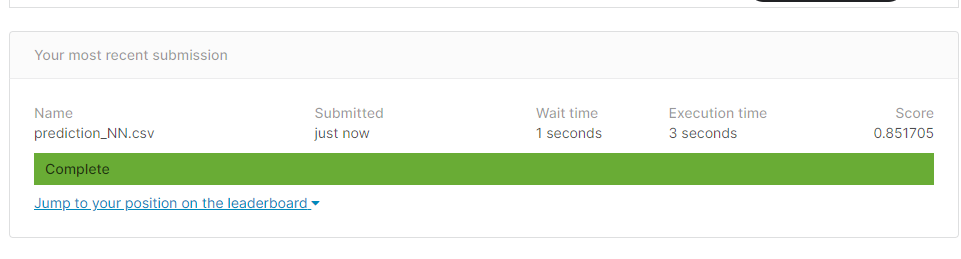